# Project DAND: Investigate a Dataset (No show Medical Appointments)

# By Rasha AL-Amoud 

# Table of Content 
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id="intro"></a>
## Introduction

  The data set that I selected for analysis is No show Medical Appointments and comes from Kaggle.
 The data describes 100k medical appointment in Brazil and is focused on whether or not patients   showed up for their appointment.A number of characteristics about the patient are included in each row.

In [39]:

#Import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns
import csv
% matplotlib inline



<a id="wrangling"></a>
## Data Wrangling


### General Properties

In [55]:

#Read csv file
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [30]:
#Descriptive a summary 
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000



## Data Cleaning

#### Spelling mistakes

In [56]:

## Rename cloumns spellling mistakes
df.rename(columns = {'Hipertension': 'Hypertension',
                'Handcap': 'Handicap','No-show':'No_show'}, inplace = True)

print(df.columns)


Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMS_received', 'No_show'],
      dtype='object')


#### Checking for errors and NaNs

In [42]:
## Checking for errors and NaNs
print('Age:',sorted(df.Age.unique()))
print('Gender:',df.Gender.unique())
print('Diabetes:',df.Diabetes.unique())
print('Alcoholism:',df.Alcoholism.unique())
print('Hypertension:',df.Hypertension.unique())
print('Handicap:',df.Handicap.unique())
print('Scholarship:',df.Scholarship.unique())
print('SMS_received:',df.SMS_received.unique())
print('No_show:',df.No_show.unique())

Age: [-1, 0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 102, 115]
Gender: ['F' 'M']
Diabetes: [0 1]
Alcoholism: [0 1]
Hypertension: [1 0]
Handicap: [0 1 2 3 4]
Scholarship: [0 1]
SMS_received: [0 1]
No_show: ['No' 'Yes']


#### Remove Age outliers

In [45]:
## Remove Age outliers
df = df[(df.Age >= 0) & (df.Age <= 90)]
df.shape


(110218, 14)

#### Checking for duplicated data

In [27]:
##Checking for duplicated data
sum(df.duplicated())

0

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110480 entries, 0 to 110526
Data columns (total 15 columns):
PatientId         110480 non-null float64
AppointmentID     110480 non-null int64
Gender            110480 non-null object
ScheduledDay      110480 non-null datetime64[ns]
AppointmentDay    110480 non-null datetime64[ns]
Age               110480 non-null int64
Neighbourhood     110480 non-null object
Scholarship       110480 non-null int64
Hypertension      110480 non-null int64
Diabetes          110480 non-null int64
Alcoholism        110480 non-null int64
Handicap          110480 non-null int64
SMS_received      110480 non-null int64
No_show           110480 non-null object
WeekDay           110480 non-null int64
dtypes: datetime64[ns](2), float64(1), int64(9), object(3)
memory usage: 13.5+ MB


<a id="eda"></a>
## Exploratory Data Analysis


### Research Question 1 (What gender has the most patients for medical appointments ?)

Distribution of patients by Gender: 

Female: 71839 
Male: 38687


Text(0.5,1,'Distribution of Gender')

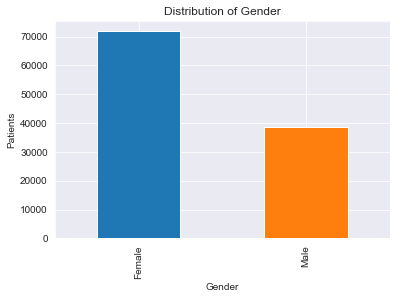

In [37]:
#What gender has the most patients for medical appointments ?

print ("Distribution of patients by Gender: \n")
print ("Female: {} \nMale: {}".format(df['Gender'].value_counts()[0], df['Gender'].value_counts()[1]) )

## Plotting gender distribution
gender_bar = df['Gender'].value_counts().plot.bar()
gender_bar.set_xticklabels(["Female", "Male"])
gender_bar.set_xlabel("Gender")
gender_bar.set_ylabel("Patients")
gender_bar.set_title('Distribution of Gender')

### Research Question 2  (What is the relationship between SMS text recived and missed appointment?)

In [9]:
#What is the relationship between SMS text recived and missed appointment
##Counting patients receive SMS text
df['SMS_received'].value_counts(normalize=True)


0    0.678974
1    0.321026
Name: SMS_received, dtype: float64

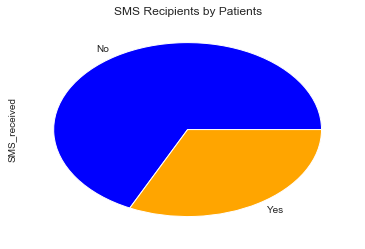

In [39]:
##Bar chart for SMS text recived
colors=['Blue','Orange']
labels=['No','Yes']
df['SMS_received'].value_counts().plot(kind='pie',colors=colors,labels=labels)
plt.title('SMS Recipients by Patients');

### Q3:What is the minimum ,maximum and mean of patient age?

In [57]:
#What is the minimum ,maximum and mean of patient age?

df = df[(df.Age >= 0) & (df.Age <= 90)]

min_age = df['Age'].min()
max_age = df['Age'].max()
mean_age=df['Age'].mean()
print ("The minimum age is {},The maximum age is {} and the mean of age is {}".format(min_age,max_age,mean_age) )



The minimum age is 0,The maximum age is 90 and the mean of age is 36.93161734018037


Text(0.5,1,'Distribution of Age')

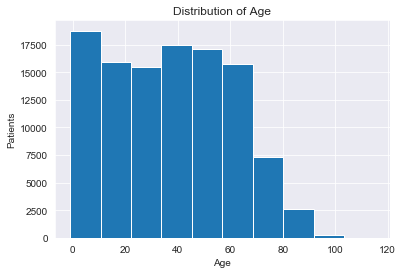

In [50]:
#Plot for Distribution of Age
plt.figure();
age_hist = df['Age'].plot.hist(bins=10)
age_hist.set_xlabel("Age")
age_hist.set_ylabel("Patients")
age_hist.set_title('Distribution of Age')

<a id='conclusions'></a>
## Conclusions



-Patients female are most recorded medical appointments than male, patients female are 71840 but patients male are 38687

-Patients who recieved a SMS text about their appointment , a large proportion of those patients are in the group missed their appointment 44% .In the group who kept thier appointments ,29% received a SMS text .

-The minimum age is 0,The maximum age is 90 and the mean of age is 36.93161734018037

Limitations

There are some limitations in a dataset,the outlier in dataset is age I delete the age that is less than 0 her in the dataset is age -1 ,Also I check for an error and null values


